In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [3]:
face_sync_df = pd.read_csv('stats/sync-vid-preds-211105-2210.csv')
raw_sync_df = face_sync_df.groupby('filename', sort=False, as_index=False).agg(min)
display(raw_sync_df)
# column = '3rd_quartile_pred'
column = 'median_pred'

sync_df = raw_sync_df[['filename', column, '3rd_quartile_pred']]
sync_df = sync_df.rename(columns={
    column: 'sync_pred', '3rd_quartile_pred': 'sync_3q'
})
display(sync_df)

,filename,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no
0,9a22372d22a52397.mp4,0.564207,0.538990,0.367158,0.791909,0
1,9bc4f1306bb8e2cd.mp4,0.542167,0.504413,0.370015,0.713077,0
2,88fe2a902a9d8cc7.mp4,0.513700,0.464985,0.387646,0.641136,0
3,1f3cbda142d0944a.mp4,0.488744,0.470903,0.333023,0.609268,0
4,63bed62257daccaf.mp4,0.487096,0.415824,0.341504,0.647832,0
...,...,...,...,...,...,...
6911,f5c4bfb20068f129.mp4,0.625857,0.702673,0.294314,0.906288,0
6912,b7b7b7f6db7f6e2e.mp4,0.765811,0.862065,0.660070,0.965780,0
6913,c3fc75289ae3b41e.mp4,0.761405,0.817571,0.656039,0.933439,0
6914,519e97d4c90aaa1c.mp4,0.590451,0.543361,0.416230,0.837065,0


,filename,sync_pred,sync_3q
0,9a22372d22a52397.mp4,0.538990,0.791909
1,9bc4f1306bb8e2cd.mp4,0.504413,0.713077
2,88fe2a902a9d8cc7.mp4,0.464985,0.641136
3,1f3cbda142d0944a.mp4,0.470903,0.609268
4,63bed62257daccaf.mp4,0.415824,0.647832
...,...,...,...
6911,f5c4bfb20068f129.mp4,0.702673,0.906288
6912,b7b7b7f6db7f6e2e.mp4,0.862065,0.965780
6913,c3fc75289ae3b41e.mp4,0.817571,0.933439
6914,519e97d4c90aaa1c.mp4,0.543361,0.837065


In [4]:
# face_path = '../stats/vid-face-preds-211022-1639.csv'
face_path = '../stats/vid-face-preds-211106-0909.csv'
raw_face_df = pd.read_csv(face_path)
display(raw_face_df)
# column = '3rd_quartile_pred'
column = 'median'

face_df = raw_face_df[['filename', column, '3rd_quartile_pred']]
face_df = face_df.rename(columns={
    column: 'face_pred', '3rd_quartile_pred': 'face_3q'
})
display(face_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,median,1st_quartile_pred,3rd_quartile_pred,group_pred
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.999568,0.995638,0.999927,0.999686
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.997323,0.962807,0.999860,0.998493
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.999326,0.997067,0.999958,0.999703
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.998871,0.997290,0.999831,0.999158
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.997788,0.975152,0.999854,0.999870
...,...,...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.237312,0.027877,0.389423,0.351240
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.040162,0.008745,0.163303,0.135718
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.507716,0.392383,0.627312,0.589261
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.005328,0.000529,0.023253,0.009802


,filename,face_pred,face_3q
0,9a22372d22a52397.mp4,0.999568,0.999927
1,9bc4f1306bb8e2cd.mp4,0.997323,0.999860
2,88fe2a902a9d8cc7.mp4,0.999326,0.999958
3,1f3cbda142d0944a.mp4,0.998871,0.999831
4,63bed62257daccaf.mp4,0.997788,0.999854
...,...,...,...
6938,f5c4bfb20068f129.mp4,0.237312,0.389423
6939,b7b7b7f6db7f6e2e.mp4,0.040162,0.163303
6940,c3fc75289ae3b41e.mp4,0.507716,0.627312
6941,519e97d4c90aaa1c.mp4,0.005328,0.023253


In [5]:
audio_path = '../FakeVoiceTorch/csvs/aisg-preds-211013-1810.csv'
raw_audio_df = pd.read_csv(audio_path)
display(raw_audio_df)

audio_df = raw_audio_df[['filename', 'median_pred', '3rd_quartile_pred']]
audio_df = audio_df.rename(columns={
    'median_pred': 'audio_pred', '3rd_quartile_pred': 'audio_3q'
})
display(audio_df)

,filename,label,trained_upon,median_pred,mean_pred,3rd_quartile_pred,1st_quartile_pred,group_pred
0,9a22372d22a52397.mp4,1,0,0.942156,0.942156,0.952945,0.939705,0.945661
1,9bc4f1306bb8e2cd.mp4,1,0,0.954891,0.954891,0.962717,0.951176,0.958116
2,88fe2a902a9d8cc7.mp4,1,0,0.953008,0.953008,0.961259,0.949398,0.957011
3,1f3cbda142d0944a.mp4,1,0,0.955451,0.955451,0.963568,0.950211,0.958797
4,63bed62257daccaf.mp4,1,0,0.955592,0.955592,0.963512,0.952683,0.958823
...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,1,0.003744,0.003744,0.006697,0.002873,0.004893
6939,b7b7b7f6db7f6e2e.mp4,0,1,0.104911,0.104911,0.145143,0.091448,0.118912
6940,c3fc75289ae3b41e.mp4,0,1,0.016028,0.016028,0.090767,0.002062,0.058182
6941,519e97d4c90aaa1c.mp4,0,1,0.690651,0.690651,0.719363,0.662181,0.695907


,filename,audio_pred,audio_3q
0,9a22372d22a52397.mp4,0.942156,0.952945
1,9bc4f1306bb8e2cd.mp4,0.954891,0.962717
2,88fe2a902a9d8cc7.mp4,0.953008,0.961259
3,1f3cbda142d0944a.mp4,0.955451,0.963568
4,63bed62257daccaf.mp4,0.955592,0.963512
...,...,...,...
6938,f5c4bfb20068f129.mp4,0.003744,0.006697
6939,b7b7b7f6db7f6e2e.mp4,0.104911,0.145143
6940,c3fc75289ae3b41e.mp4,0.016028,0.090767
6941,519e97d4c90aaa1c.mp4,0.690651,0.719363


In [6]:
tri_df = pd.merge(
    left=labels_df, right=audio_df, 
    left_on='filename', right_on='filename'
)
tri_df = pd.merge(
    left=tri_df, right=face_df, 
    left_on='filename', right_on='filename'
)
tri_df = pd.merge(
    left=tri_df, right=sync_df, 
    left_on='filename', right_on='filename'
)
display(tri_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,audio_pred,audio_3q,face_pred,face_3q,sync_pred,sync_3q
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.942156,0.952945,0.999568,0.999927,0.538990,0.791909
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.954891,0.962717,0.997323,0.999860,0.504413,0.713077
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.953008,0.961259,0.999326,0.999958,0.464985,0.641136
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.955451,0.963568,0.998871,0.999831,0.470903,0.609268
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.955592,0.963512,0.997788,0.999854,0.415824,0.647832
...,...,...,...,...,...,...,...,...,...,...,...,...
6911,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.003744,0.006697,0.237312,0.389423,0.702673,0.906288
6912,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.104911,0.145143,0.040162,0.163303,0.862065,0.965780
6913,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.016028,0.090767,0.507716,0.627312,0.817571,0.933439
6914,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.690651,0.719363,0.005328,0.023253,0.543361,0.837065


In [7]:
X = tri_df[['audio_pred', 'face_pred', 'sync_pred']]
y = tri_df['label']
display(X)

,audio_pred,face_pred,sync_pred
0,0.942156,0.999568,0.538990
1,0.954891,0.997323,0.504413
2,0.953008,0.999326,0.464985
3,0.955451,0.998871,0.470903
4,0.955592,0.997788,0.415824
...,...,...,...
6911,0.003744,0.237312,0.702673
6912,0.104911,0.040162,0.862065
6913,0.016028,0.507716,0.817571
6914,0.690651,0.005328,0.543361


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)
print(y_train)

      audio_pred  face_pred  sync_pred
63      0.950130   0.555415   0.421033
1044    0.916517   0.018979   0.596003
2592    0.926070   0.000925   0.887673
3053    0.029554   0.999443   0.589593
227     0.908456   0.274573   0.924924
...          ...        ...        ...
3772    0.926025   0.759899   0.932199
5191    0.001680   0.296477   0.995987
5226    0.030589   0.000039   0.980367
5390    0.020582   0.000566   0.882000
860     0.947250   0.992329   0.852197

[5532 rows x 3 columns]
63      1
1044    1
2592    1
3053    1
227     1
       ..
3772    1
5191    0
5226    0
5390    0
860     1
Name: label, Length: 5532, dtype: int64


[0.73947425 0.33408743 0.74088343 ... 0.32432986 0.20310349 0.99734683]


(array([ 119.,  129.,  118.,  111.,   90.,   95.,   66.,   98.,   95.,
          90.,   75.,  109.,   99.,  102.,  103.,   99.,   83.,   66.,
          57.,   47.,   51.,   36.,   40.,   46.,   48.,   41.,   39.,
          50.,   47.,   48.,   41.,   54.,   61.,   69.,   54.,   65.,
          71.,   74.,   63.,   85.,   78.,   87.,  105.,   87.,  110.,
         123.,  149.,  241.,  401., 1217.]),
 array([0.00678451, 0.02662649, 0.04646848, 0.06631046, 0.08615245,
        0.10599443, 0.12583642, 0.1456784 , 0.16552039, 0.18536237,
        0.20520436, 0.22504634, 0.24488833, 0.26473031, 0.2845723 ,
        0.30441428, 0.32425627, 0.34409825, 0.36394024, 0.38378222,
        0.4036242 , 0.42346619, 0.44330817, 0.46315016, 0.48299214,
        0.50283413, 0.52267611, 0.5425181 , 0.56236008, 0.58220207,
        0.60204405, 0.62188604, 0.64172802, 0.66157001, 0.68141199,
        0.70125398, 0.72109596, 0.74093795, 0.76077993, 0.78062192,
        0.8004639 , 0.82030588, 0.84014787, 0.85998985, 

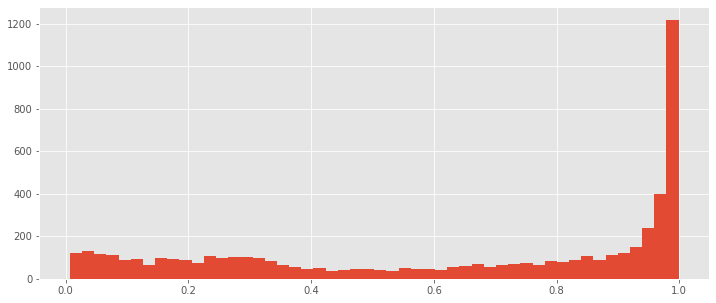

In [9]:
clf = LogisticRegression(random_state=42, multi_class='ovr').fit(X_train, y_train)
train_preds = clf.predict_proba(X_train)[:, 1]
print(train_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(train_preds, bins=50)

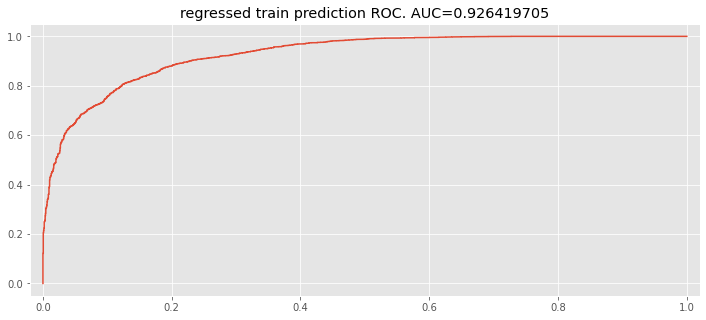

In [10]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_train, train_preds)
auc = sklearn.metrics.roc_auc_score(y_train, train_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("regressed train prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

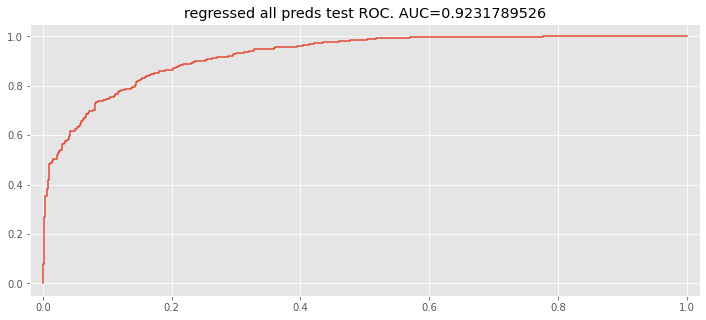

In [11]:
test_preds = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, test_preds)
auc = sklearn.metrics.roc_auc_score(y_test, test_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("regressed all preds test ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

use SGD classfier

[0.79258101 0.39899721 0.81267422 ... 0.35427189 0.21705872 0.99849523]


(array([ 122.,  130.,  107.,  105.,   87.,   74.,   79.,   63.,   92.,
          79.,   92.,   69.,   90.,   81.,   94.,   94.,   90.,   76.,
          56.,   79.,   47.,   32.,   54.,   37.,   40.,   35.,   41.,
          38.,   43.,   34.,   48.,   56.,   51.,   52.,   56.,   55.,
          56.,   67.,   65.,   81.,   78.,   82.,  112.,  117.,  139.,
         125.,  152.,  191.,  371., 1418.]),
 array([0.00557434, 0.02545097, 0.0453276 , 0.06520423, 0.08508086,
        0.10495749, 0.12483411, 0.14471074, 0.16458737, 0.184464  ,
        0.20434063, 0.22421726, 0.24409389, 0.26397051, 0.28384714,
        0.30372377, 0.3236004 , 0.34347703, 0.36335366, 0.38323028,
        0.40310691, 0.42298354, 0.44286017, 0.4627368 , 0.48261343,
        0.50249006, 0.52236668, 0.54224331, 0.56211994, 0.58199657,
        0.6018732 , 0.62174983, 0.64162645, 0.66150308, 0.68137971,
        0.70125634, 0.72113297, 0.7410096 , 0.76088623, 0.78076285,
        0.80063948, 0.82051611, 0.84039274, 0.86026937, 

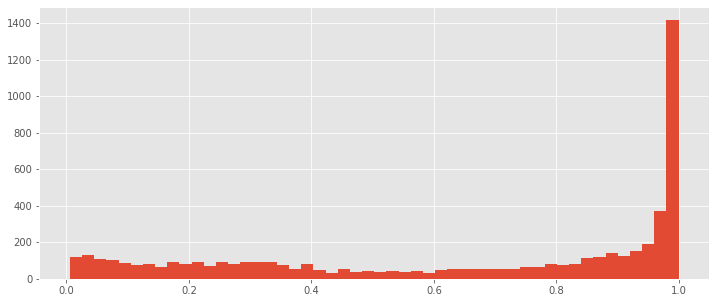

In [12]:
clf = SGDClassifier(random_state=42, loss='log').fit(X_train, y_train)
train_preds = clf.predict_proba(X_train)[:, 1]
print(train_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(train_preds, bins=50)

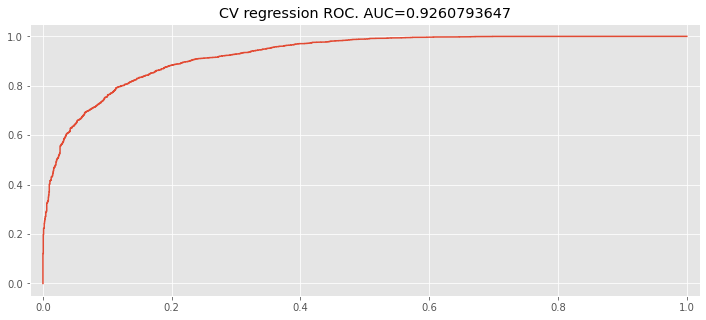

In [13]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_train, train_preds)
auc = sklearn.metrics.roc_auc_score(y_train, train_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("CV regression ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

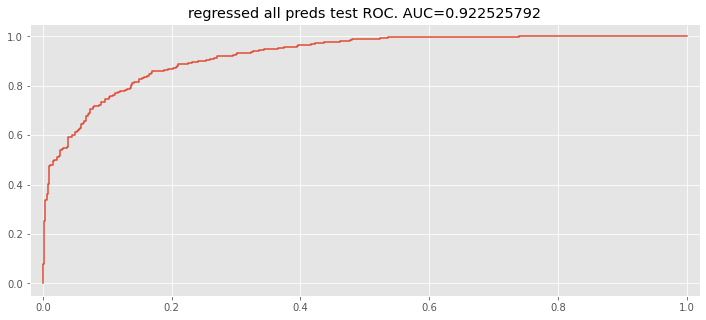

In [14]:
test_preds = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, test_preds)
auc = sklearn.metrics.roc_auc_score(y_test, test_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("regressed all preds test ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

Attempts to use max to agregate predictions manually instead

In [15]:
raw_sync_df

,filename,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no
0,9a22372d22a52397.mp4,0.564207,0.538990,0.367158,0.791909,0
1,9bc4f1306bb8e2cd.mp4,0.542167,0.504413,0.370015,0.713077,0
2,88fe2a902a9d8cc7.mp4,0.513700,0.464985,0.387646,0.641136,0
3,1f3cbda142d0944a.mp4,0.488744,0.470903,0.333023,0.609268,0
4,63bed62257daccaf.mp4,0.487096,0.415824,0.341504,0.647832,0
...,...,...,...,...,...,...
6911,f5c4bfb20068f129.mp4,0.625857,0.702673,0.294314,0.906288,0
6912,b7b7b7f6db7f6e2e.mp4,0.765811,0.862065,0.660070,0.965780,0
6913,c3fc75289ae3b41e.mp4,0.761405,0.817571,0.656039,0.933439,0
6914,519e97d4c90aaa1c.mp4,0.590451,0.543361,0.416230,0.837065,0


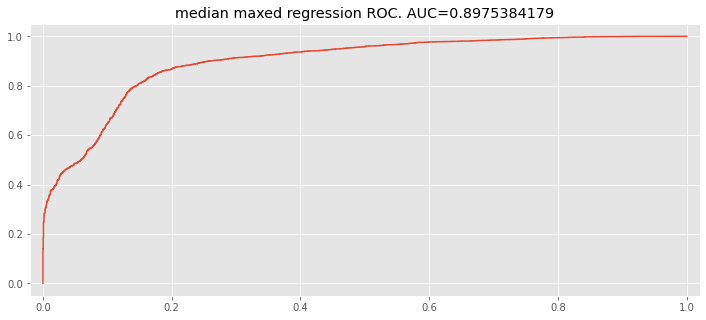

In [16]:
mixed_x = np.max(X.to_numpy(), axis=1)
fpr, tpr, _ = sklearn.metrics.roc_curve(y, mixed_x)
auc = sklearn.metrics.roc_auc_score(y, mixed_x)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("median maxed regression ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

In [24]:
tri_df

,filename,label,audio_fake,face_fake,swap_fake,both_fake,audio_pred,audio_3q,face_pred,face_3q,sync_pred,sync_3q
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.942156,0.952945,0.999568,0.999927,0.538990,0.791909
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.954891,0.962717,0.997323,0.999860,0.504413,0.713077
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.953008,0.961259,0.999326,0.999958,0.464985,0.641136
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.955451,0.963568,0.998871,0.999831,0.470903,0.609268
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.955592,0.963512,0.997788,0.999854,0.415824,0.647832
...,...,...,...,...,...,...,...,...,...,...,...,...
6911,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.003744,0.006697,0.237312,0.389423,0.702673,0.906288
6912,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.104911,0.145143,0.040162,0.163303,0.862065,0.965780
6913,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.016028,0.090767,0.507716,0.627312,0.817571,0.933439
6914,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.690651,0.719363,0.005328,0.023253,0.543361,0.837065


[1.09292728 1.09285993 1.0929584  ... 0.84043917 0.74406471 0.84120868]


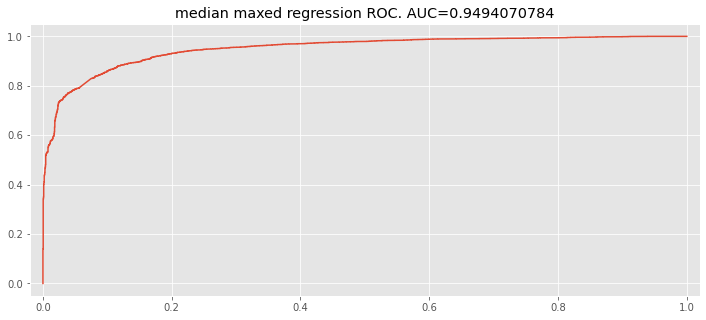

In [114]:
face_preds = tri_df['face_3q'].to_numpy() + 0.093
audio_preds = tri_df['audio_pred'].to_numpy()
sync_preds = tri_df['sync_3q'].to_numpy() - 0.093
labels = tri_df['label'].to_numpy()

preds = np.array([face_preds, audio_preds, sync_preds])
preds = np.max(preds, axis=0)
print(preds)
fpr, tpr, _ = sklearn.metrics.roc_curve(labels, preds)
auc = sklearn.metrics.roc_auc_score(labels, preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("median maxed regression ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)